<a href="https://colab.research.google.com/github/Nico412-cyber/msci151/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv('/content/sample_data/BostonHousing.csv')
display(df.head())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Task
Analyze the feature importance of a Random Forest Regressor model predicting 'medv' using 'crim', 'age', and 'dis' as features from the dataset at "/content/sample_data/BostonHousing.csv", with an 80/20 train-test split.

## Prepare data

### Subtask:
Select the features (crim, age, dis) and the target variable (medv) from the dataframe.


**Reasoning**:
Select the specified features and target variable from the DataFrame.



In [3]:
features = df[['crim', 'age', 'dis']]
target = df['medv']

display(features.head())
display(target.head())

,crim,age,dis
0,0.00632,65.2,4.0900
1,0.02731,78.9,4.9671
2,0.02729,61.1,4.9671
3,0.03237,45.8,6.0622
4,0.06905,54.2,6.0622


,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Split data

### Subtask:
Split the data into training and testing sets using an 80/20 rule.


**Reasoning**:
Split the data into training and testing sets and print their shapes.



In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (404, 3)
Shape of X_test: (102, 3)
Shape of y_train: (404,)
Shape of y_test: (102,)


## Train model

### Subtask:
Train a Random Forest Regressor model on the training data.


**Reasoning**:
Import the necessary class, instantiate the model, and fit it to the training data as per the instructions.



In [5]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Calculate feature importance

### Subtask:
Get the feature importances from the trained model.


**Reasoning**:
Get the feature importances from the trained model and display them.



In [6]:
feature_importances = model.feature_importances_
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)
display(feature_importance_series)

,0
crim,0.522535
age,0.182530
dis,0.294935


## Visualize feature importance

### Subtask:
Display the feature importances to understand which features are most influential in predicting the target variable.


**Reasoning**:
Generate a bar plot to visualize the feature importances.



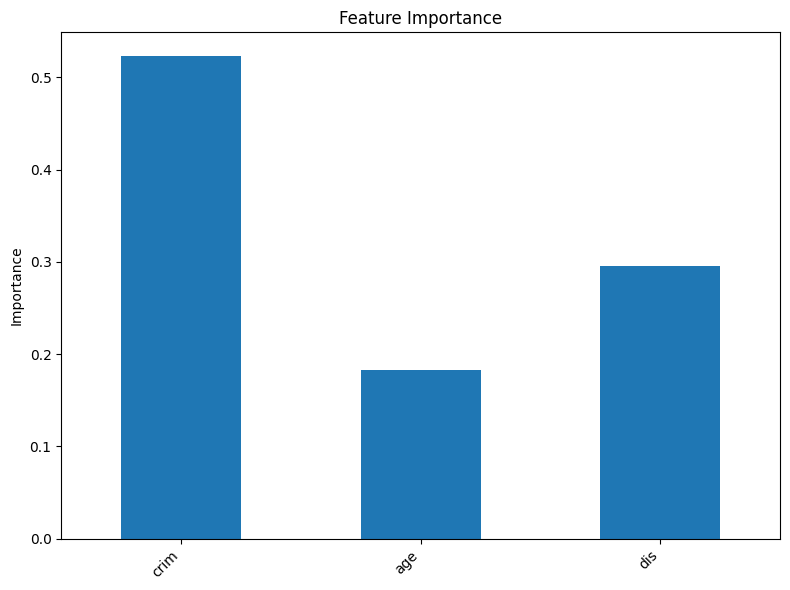

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
feature_importance_series.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The Random Forest Regressor model was trained using 'crim', 'age', and 'dis' as features to predict 'medv'.
*   The feature importances calculated by the model were approximately: 'crim' (0.52), 'dis' (0.29), and 'age' (0.18).
*   'crim' (per capita crime rate by town) was found to be the most important feature in predicting 'medv', followed by 'dis' (weighted distances to five Boston employment centres) and 'age' (proportion of owner-occupied units built prior to 1940).

### Insights or Next Steps

*   Given the high importance of 'crim', further investigate the relationship between crime rate and median home value.
*   Consider including additional features or exploring different model types to potentially improve prediction accuracy and gain further insights.
